# **Variables & Memory Management**

# **Topics**

1. **Introduction to Python references** 
2. **Reference counting**
3. **Counting references**
4. **Python Garbage Collection**
5. ****Dynamic Typing in Python**
6. **Python Mutable and Immutable**
7. **Python is operator**
8. **Python is not operator**
9. **Python None**

## **Introduction to Python references**
* In Python, a variable is not a label of a value like you may think. Instead, A variable references an object that holds a value. In other words, variables are references.

* The following example assigns a number with the value of 100 to a variable:
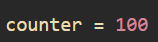

* Behind the scene, Python creates a new integer object (int) in the memory and binds the counter variable to that memory address:
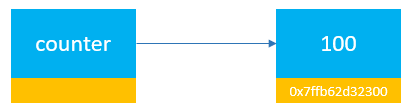

* When you access the counter variable, Python looks up the object referenced by the counter and returns the value of that object:


* So variables are references that point to the objects in the memory.

* To find the memory address of an object referenced by a variable, you pass the variable to the built-in id() function.

* For example, the following returns the memory address of the integer object referenced by the counter variable:


In [1]:
counter = 100
print(id(counter)) 

1641259339088


* The **id()** function returns the memory address of an object referenced by a variable as a base-10 number.

* To convert this memory address to a hexadecimal, you use the hex() function:

In [2]:
counter = 100

print(id(counter)) 
print(hex(id(counter))) 

1641259339088
0x17e22ae0d50


## **Reference counting**
* An object in the memory address can have one or more references. For example:
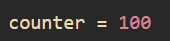

* The integer object with the value of 100 has one reference which is the counter variable. If you assign the counter to another variable e.g., max:
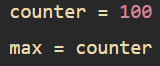

* Now, both counter and max variables reference the same integer object. The integer object with value 100 has two references:
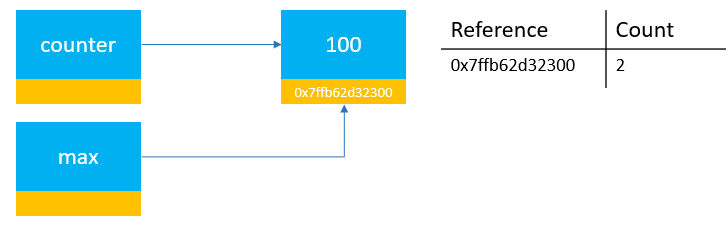

* If you assign a different value to the max variable:
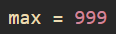

* …the integer object with value 100 has one reference, which is the counter variable:
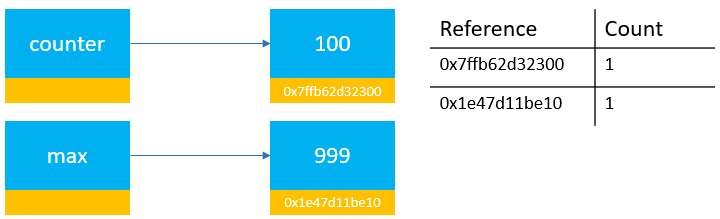

* And the number of references of the integer object with a value of 100 will be zero if you assign a different value to the counter variable:
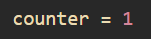
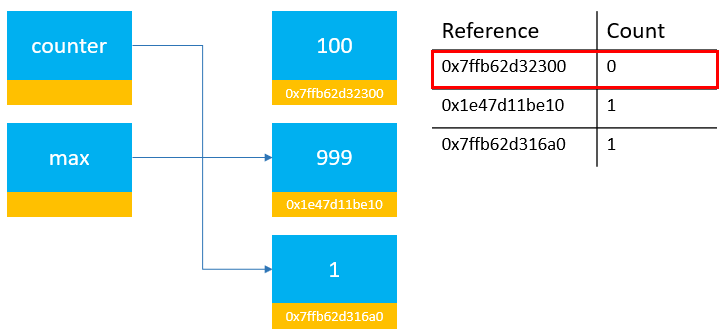

* Once an object doesn’t have any reference, Python Memory Manager will destroy that object and reclaim the memory.

## **Counting references**
* To get the number of references of an object, you use the from_address() method of the ctypes module.
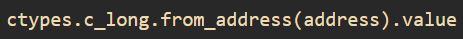

* To use this method, you need to pass the memory address of the object that you want to count the references. Also, the address needs to be an integer number.

* The following defines a function called ref_count() that uses the from_address() method:


In [3]:
import ctypes


def ref_count(address):
    return ctypes.c_long.from_address(address).value

* Now, you can use a shorter ref_count() function instead of using the long syntax like above.

* This example defines a list of three integers:

In [4]:
numbers = [1, 2, 3]

* To get the memory address of the numbers list, you use the id() function as follows:

In [5]:
numbers_id = id(numbers)

* The following shows the number of references of the list referenced by the numbers variable:

In [6]:
print(ref_count(numbers_id))  # 1

1


* It returns one because currently only the numbers variable references the list.

* This assigns the numbers variable to a new variable:

In [7]:
ranks = numbers

* The number of references of the list should be two now because it is referenced by both numbers and ranks variables:

In [8]:
print(ref_count(numbers_id)) # 2

2


* If you assign ranks variable None, the reference count of the list will reduce to one:

In [9]:
ranks = None
print(ref_count(numbers_id))  # 1


1


* And if you assign the numbers variable None, the number of references of the list will be zero:

In [10]:
numbers = None
print(ref_count(numbers_id))  # 0

1


* Put it all together:

In [11]:
import ctypes


def ref_count(address):
    return ctypes.c_long.from_address(address).value


numbers = [1, 2, 3]
numbers_id = id(numbers)

print(ref_count(numbers_id))  # 1

ranks = numbers
print(ref_count(numbers_id))  # 2

ranks = None
print(ref_count(numbers_id))  # 1

numbers = None
print(ref_count(numbers_id))  # 0

1
2
1
1


## **Python Garbage Collection**
### **Introduction to Python garbage collection**
* In C/C++, you’re fully responsible for managing the memory of the program. However, in Python, you don’t have to manage the memory yourself because Python does it for you automatically.

* In the references tutorial, you’ve learned that Python Memory Manager keeps track of references of objects. The Memory Manager destroys the object and reclaims the memory once the reference count of that object reaches zero.

* However, reference counting doesn’t work properly all the time. For example, when you have an object that references itself or two objects reference each other. This creates something called circular references.

* When the Python Memory Manager cannot remove objects with circular references, it causes a memory leak.

* This is why the garbage collector comes into play to fix the circular references.

* Python allows you to interact with the garbage collector via the built-in gc module.


### **Interacting with Python garbage collector**
* In this example, we’ll first create a circular reference between two instances of class A and class B. Then, we use the garbage collector to destroy the objects in the circular reference.

* First, import the gc and ctypes modules and defines two functions for counting references and check if an object exists in the memory:

In [12]:
import gc
import ctypes


def ref_count(address):
    return ctypes.c_long.from_address(address).value


def object_exists(object_id):
    for object in gc.get_objects():
        if id(object) == object_id:
            return True

    return False

* In this code, the ref_count() returns the reference count of an object specified by its memory address. And the object_exists() function returns True if an object exists in the memory.

* Second, create two classes A and B that have a reference each other:

In [13]:
class A:
    def __init__(self):
        self.b = B(self)
        print(f'A: {hex(id(self))}, B: {hex(id(self.b))}')


class B:
    def __init__(self, a):
        self.a = a
        print(f'B: {hex(id(self))}, A: {hex(id(self.a))}')


* Third, disable the garbage collector by calling the disable() function:

In [14]:
gc.disable()

* Fourth, create a new instance of class A that also automatically creates a new instance of B:

In [15]:
a = A()

B: 0x17e2751b1c0, A: 0x17e2751abf0
A: 0x17e2751abf0, B: 0x17e2751b1c0


* Fifth, define two variables to hold the memory addresses of the instances of A and B. 
* These variables keep track of the memory addresses of instances of A and B when the variable a references another object.

In [16]:
a_id = id(a)
b_id = id(a.b)

* Sixth, show the reference counts of instances of A and B:

In [17]:
print(ref_count(a_id))  # 2
print(ref_count(b_id))  # 1

2
1


* The instance of A has two references which is the variable a and the instance of B. And the instance of B has one reference which is the instance of A.

* Seventh, check if both instances of A and B are in the memory:

In [18]:
print(object_exists(a_id))  # True
print(object_exists(b_id))  # True

True
True


* Both of them exist.

* Eighth, set a variable to None:

In [19]:
a = None

In [20]:
print(ref_count(a_id))  # 1
print(ref_count(b_id))  # 1

1
1


* Now, both reference count of the instance of A and B is 1.

* Tenth, check if the instances exist:

In [21]:
print(object_exists(a_id))  # True
print(object_exists(b_id))  # True

True
True


* Both of them still exist as expected.

* Eleventh, start the garbage collector:

In [22]:
gc.collect()

4

* When the garbage collector runs, it can detect the circular reference, destroy the objects, and reclaim the memory.

* Twelveth, check if the instances of A and B exist:

In [23]:
print(object_exists(a_id))  # False
print(object_exists(b_id))  # False

False
False


* Both of them don’t exist anymore due to the garbage collector.

* Thirteenth, get the reference counts of the instances of A and B:

In [24]:
print(ref_count(a_id))  # 0
print(ref_count(b_id))  # 0

2
0


## **Dynamic Typing in Python**
### **Introduction to dynamic typing in Python**
* In some programming languages such as Java or C#, when declaring a variable, you need to specify a data type for it.

* For example, the following defines a variable in Java:
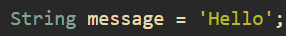

* Behind the scene, Java creates a new String object whose value is 'Hello'. It also creates a variable called message with type String and references the message variable to the String object.

* In statically typed languages, the data types are associated with variables.

* Later, if you assign an integer to the message variable, it’s not going to work. The reason is that the message variable is already associated with the String type, not the integer type.

* Unlike statically-typed languages, Python is a dynamically typed language. When declaring a variable in Python, you don’t specify a type for it:
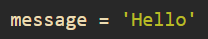

* In Python, the message variable is just a reference to an object which is a string. There is no type associated with the message variable.
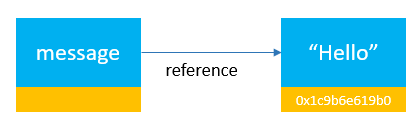

* If you assign the message to a number, it’s perfectly fine:


* In this case, Python creates a new integer object and the message references to the new integer object:
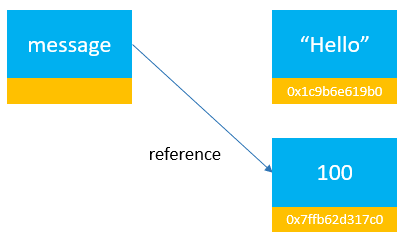

* To determine the type of object that a variable currently references, you use the type() function.

* The following example defines a variable named message and assigned it a string 'Hello':


In [25]:
message = 'Hello'
print(type(message))

<class 'str'>


* When you assign a number to the message variable, type of the object that the message variable references by also changes:

In [26]:
message = 100
print(type(message))

<class 'int'>


## **Python Mutable and Immutable**
### **Introduction to mutable and immuable in Python**
* In Python, everything is an object. An object has its own internal state. Some objects allow you to change their internal state and others don’t.

* An object whose internal state can be changed is called a mutable object, while an object whose internal state cannot be changed is called an immutable object.

* The following are examples of immutable objects:

    * Numbers (int, float, bool,…)
    * Strings
    * Tuples
    * Frozen sets
* And the following are examples of mutable objects:

    * Lists
    * Sets
    * Dictionaries
* User-defined classes can be mutable or immutable, depending on whether their internal state can be changed or not.

### **Python immutable example**
* When you declare a variable and assign its an integer, Python creates a new integer object and sets the variable to reference that object:


In [27]:
counter = 100

* To get the memory address referenced by a variable, you use the id() function. The id() function returns a based-10 number:

In [28]:
print(id(counter))

1641259339088


* And to convert the base-10 number to hexadecimal, you can use the hex() function:

In [29]:
print(hex(id(100)))

0x17e22ae0d50


* In the memory, you have a variable called counter that references an integer object located at the 0x7ffb62d32300 address:
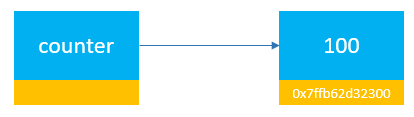

* The following changes the counter to 200 and displays its value to the screen:

In [30]:
counter = 200
print(counter)

200


* It seems that the value of the object referenced by the counter variable changes, but it doesn’t.

* In fact, Python creates a new integer object with the value 200 and reassigns the counter variable so that it references the new object like this:
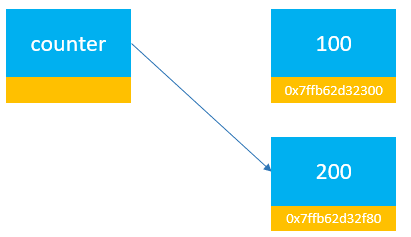

* The reassignment doesn’t change the value of the first integer object. It just reassigns the reference.

* The following shows the memory address of the new object referenced by the counter variable:
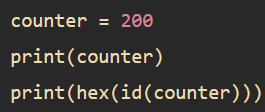

### **Python mutable example**
* The following defines a list of numbers and displays the memory address of the list:


In [31]:
ratings = [1, 2, 3]
print(hex(id(ratings)))  # 0x1840f97a340

0x17e27555a00


* Behind the scene, Python creates a new list object and sets the ranks variable to reference the list:
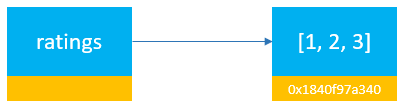
* When you add a number to the list like this:

In [32]:
ratings.append(4)

* Python directly changes the value of the list object:
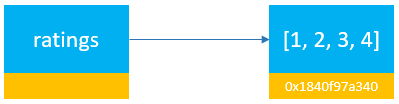
* And Python doesn’t create a new object like the previous immutable example.

* The following code shows the value and memory address of the list referenced by the ratings variable:

In [33]:
print(ratings)  # [1, 2, 3, 4]
print(hex(id(ratings)))  # 0x1840f97a340

[1, 2, 3, 4]
0x17e27555a00


* As you can see clearly from the output, the memory address of the list is the same.
### **Python mutable and immutable example**
* It’s important to understand that immutable objects are not something frozen or absolutely constant. Let’s take a look at an example.

* The following defines a tuple whose elements are the two lists:

In [34]:
low = [1, 2, 3]
high = [4, 5]

rankings = (low, high)

* Since the rankings is a tuple, it’s immutable. So you cannot add a new element to it or remove an element from it.
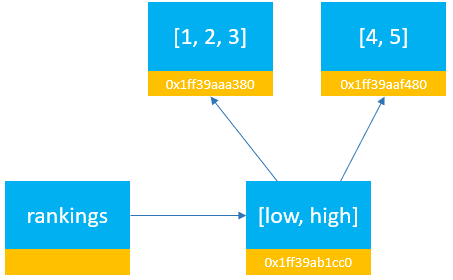
* However, the rankings tuple contains two lists that are mutable objects. Therefore, you can add a new element to the high list without any issue:


In [35]:
high.append(6)
print(rankings)

([1, 2, 3], [4, 5, 6])


* And the rankings tuple changes to the following:

In [36]:
([1, 2, 3], [4, 5, 6])

([1, 2, 3], [4, 5, 6])

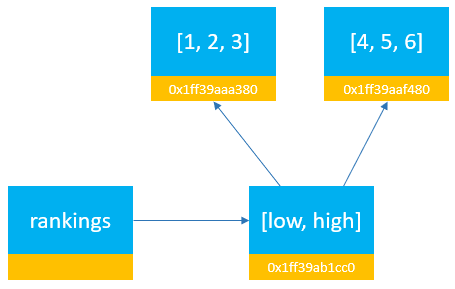

## **Python is operator**
### **Introduction to the Python is operator**
* Python is operator compares two variables and returns True if they reference the same object. If the two variables reference different objects, the is operator returns False.

* In other words, the is operator compares the identity of two variables and returns True if they reference the same object.

* Let’s take a look at the following example:


In [37]:
a = 100
b = a
result = a is b
print(result)

True


### **How it works**

* First, define the a variable that references an int object with the value of 100.
* Second, define another variable b that references the same object referenced by the a variable.
* Third, use the is operator to check if a and b reference the same object and display the result.
* Since both a and b reference the same object, the result is True.
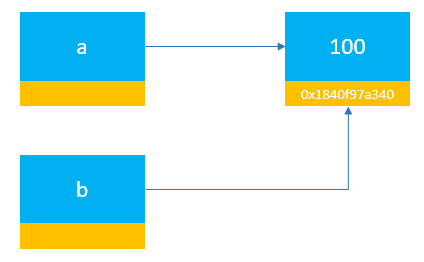
* The following example defines two variables a and b and initialize them to 100:


In [38]:
a = 100
b = 100

result = a is b
print(result)

True


* In this example, there’s no link between a and b. 
* However, when you assign 100 to b, Python Memory Manager reuses the existing object. Therefore, both a and b references the same object:
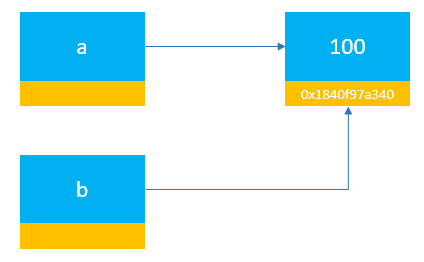
* Note that the result of this example may be different, depending on how the Python Memory Manager is implemented. And you should not count on it.

* The following example defines two lists with the same elements and uses the is operator to check if they reference the same list object:


In [39]:
ranks = [1, 2, 3]
rates = [1, 2, 3]

result = ranks is rates
print(result)

False


* In this example, lists are mutable objects. Python Memory Manager doesn’t reuse the existing list but creates a new one in the memory. Therefore, the ranks and rates variables reference different lists:
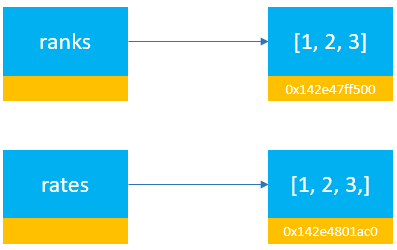
### **Python is operator vs == operator**
* The equality operator (==) compares two variables for equality and returns True if they are equal. Otherwise, it returns False.

* The following example uses both is operator and == operator:

In [40]:
a = 100
b = a

is_identical = a is b
is_equal = a == b

print(is_identical)
print(is_equal)

True
True


* Since a and b references the same object, they’re both identical and equal.

* In the following example, both lists have the same elements, so they’re equal.

* However, since they reference different list objects in the memory, they’re not identical:

In [41]:
ranks = [1, 2, 3]
rates = [1, 2, 3]

is_identical = ranks is rates
is_equal = ranks == rates

print(is_identical)
print(is_equal)


False
True


## **Python is not operator**
* To negate the is operator, you use the not operator. The is not operator returns False if two variables reference the same object. Otherwise, it returns True.

* The following example uses the is not operator to check if the two variables don’t reference the same list object:


In [1]:
ranks = [1, 2, 3]
rates = [1, 2, 3]

result = ranks is not rates
print(result)  # True

True


## **Python None**
#### **Introduction to the Python None value**
* In Python, None is a special object of the NoneType class. To use the None value, you specify the None as follows:

* If you use the type() function to check the type of the None value, you’ll get NoneType class:


In [43]:
print(type(None))

<class 'NoneType'>


* The None is a singleton object of the NoneType class. It means that Python creates one and only one None object at runtime.

* Therefore, if you use the equality (==) or is operator to compare None with None, you’ll get the result of True:

In [44]:
print(None == None)
print(None is None)

True
True


* It’s a good practice to use the is or is not operator to compare a value with None.

* The reason is that the user-defined objects may change the equality operator’s behavior by overriding the __eq__() method. For example:


In [45]:
class Apple:
    def __eq__(self, other):
        return True


apple = Apple()
print(apple == None)

True


* Note that you cannot override the is operator behavior like you do with the equality operator (==).

* It’s also important to note that the None object has the following features:

    * None is not zero (0, 0.0, …).
    * None is not the same as False.
    * None is not the same as an empty string ('').
* Comparing None to any value will return False except None itself.

### **The applications of the Python None object**
* Let’s take some practical examples of using the None object.

#### **1) Using Python None as an initial value for a variable**
* When a variable doesn’t have any meaningful initial value, you can assign None to it, like this:


In [46]:
state = None

* Then you can check if the variable is assigned a value or not by checking it with None as follows:

In [47]:
if state is None:
    state = 'start'

### **2) Using the Python None object to fix the mutable default argument issue**
* The following function appends a color to a list:

In [48]:
def append(color, colors=[]):
    colors.append(color)
    return colors

* It works as expected if you pass an existing list:

In [49]:
colors = ['red', 'green']
append('blue', colors)

print(colors)

['red', 'green', 'blue']


* It works as expected if you pass an existing list:

In [50]:
colors = ['red', 'green']
append('blue', colors)

print(colors)

['red', 'green', 'blue']


* However, the problem arises when you use the default value of the second parameter. For example:

In [51]:
hsl = append('hue')
print(hsl)

rgb = append('red')
print(rgb)

['hue']
['hue', 'red']


* The issue is that the function creates the list once defined and uses the same list in each successive call.

* To fix this issue, you can use the None value as a default parameter as follows:

In [52]:
def append(color, colors=None):
    if colors is None:
        colors = []

    colors.append(color)
    return colors


hsl = append('hue')
print(hsl)


rgb = append('red')
print(rgb)

['hue']
['red']


### **3) Using the Python None object as a return value of a function**
* When a function doesn’t have a return value, it returns None by default. For example:


In [53]:
def say(something):
    print(something)


result = say('Hello')
print(result)

Hello
None


* The say() function doesn’t return anything; therefore, it returns None.